In [10]:
from nav_EDA import nav_df, specs_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


nav_df.head()





,date,100033,100034,100037,100038,100041,100042,100043,100044,100046,...,153431,153432,153433,153434,153435,153438,153443,153444,153445,153451
0,06-Apr-2020,NaN,NaN,NaN,NaN,108.0230,516.1577,529.6844,163.6940,100.1950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07-Apr-2020,304.87,65.080,12.85170,88.81800,108.0230,516.1685,529.6956,163.6940,100.1950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-Apr-2020,305.53,65.220,12.68110,87.63900,108.0230,516.2044,529.7324,163.6940,100.1950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09-Apr-2020,318.12,67.910,12.68620,87.67440,108.0230,516.2479,529.7770,163.6940,100.1950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10-Apr-2020,315.98,67.455,12.69845,87.75905,108.0371,516.3153,529.8461,163.7154,100.2081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

nav_equity_bm = nav_df[['date','135607']] # LIC MF Nifty 50 ETF
nav_equity_bm['date'] = nav_df['date']
nav_equity_bm_pct = nav_df[['date','135607']]
nav_equity_bm_pct['date'] = nav_df['date']
nav_equity_bm_pct['135607'] = nav_equity_bm_pct['135607'].pct_change()
nav_equity_bm_pct.set_index('date', inplace=True)





/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3350411948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nav_equity_bm['date'] = nav_df['date']
/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3350411948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nav_equity_bm_pct['date'] = nav_df['date']
/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3350411948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [12]:
nav_debt_bm = nav_df[['date','139430']] # SBI Nifty 10 yr Benchmark G-Sec ETF
nav_debt_bm['date'] = nav_df['date']
nav_debt_bm_pct = nav_df[['date','139430']]
nav_debt_bm_pct['date'] = nav_df['date']
nav_debt_bm_pct['139430'] = nav_debt_bm_pct['139430'].pct_change()
nav_debt_bm_pct.set_index('date', inplace=True)

/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3371915502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nav_debt_bm['date'] = nav_df['date']
/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3371915502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nav_debt_bm_pct['date'] = nav_df['date']
/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3371915502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [13]:
specs_equity_df = specs_df[specs_df['sub_type'] == "Equity Scheme"] # Equity Schemes
specs_debt_df = specs_df[specs_df['sub_type'] == "Debt Scheme"] # Debt Schemes
specs_df[specs_df['Scheme Code'] == '135607']



,Scheme Code,shceme_name,category,amc,main_type,sub_type,specific_type
5905,135607,LIC MF Nifty 50 ETF,Open Ended Schemes ( Other Scheme - Other ETFs ),LIC Mutual Fund,Open Ended Schemes,Other Scheme,Other ETFs


In [14]:
nav_df.set_index('date', inplace=True) # Set date as index
nav_equity_df = nav_df[nav_df.columns.intersection(specs_equity_df['Scheme Code'].values)] # Equity Schemes
nav_debt_df = nav_df[nav_df.columns.intersection(specs_debt_df['Scheme Code'].values)] # Debt Schemes
nav_df.reset_index(inplace=True) # Reset index to date

In [15]:
nav_equity_pct_df = nav_equity_df
nav_debt_pct_df = nav_debt_df
# nav_equity_pct_df.set_index('date', inplace=True)
# nav_debt_pct_df.set_index('date', inplace=True)
for col in nav_equity_pct_df.columns:
    nav_equity_pct_df[col] = nav_equity_df[col].pct_change()
for col in nav_debt_pct_df.columns:
    nav_debt_pct_df[col] = nav_debt_df[col].pct_change()





/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3329557898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nav_equity_pct_df[col] = nav_equity_df[col].pct_change()
/var/folders/j3/btykbjss2l15b55qw91h85hc0000gn/T/ipykernel_51174/3329557898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nav_debt_pct_df[col] = nav_debt_df[col].pct_change()


In [16]:
print(nav_equity_pct_df.columns)

Index(['100033', '100034', '100063', '100064', '100067', '100068', '100080',
       '100156', '100174', '100175',
       ...
       '153308', '153309', '153324', '153325', '153326', '153327', '153364',
       '153365', '153366', '153367'],
      dtype='object', length=2350)


In [17]:
print(nav_equity_bm_pct)
print(nav_equity_pct_df)

               135607
date                 
06-Apr-2020       NaN
07-Apr-2020       NaN
08-Apr-2020 -0.004974
09-Apr-2020  0.041542
10-Apr-2020 -0.006464
...               ...
31-Mar-2025 -0.000003
01-Apr-2025 -0.015001
02-Apr-2025  0.007185
03-Apr-2025 -0.003528
04-Apr-2025 -0.014885

[1305 rows x 1 columns]
               100033    100034    100063    100064    100067    100068  \
date                                                                      
06-Apr-2020       NaN       NaN       NaN       NaN       NaN       NaN   
07-Apr-2020       NaN       NaN       NaN       NaN       NaN       NaN   
08-Apr-2020  0.002165  0.002151  0.011036  0.011051  0.005391  0.005817   
09-Apr-2020  0.041207  0.041245  0.034101  0.034073  0.040601  0.035181   
10-Apr-2020 -0.006727 -0.006700 -0.002234 -0.002247 -0.004711 -0.004190   
...               ...       ...       ...       ...       ...       ...   
31-Mar-2025 -0.000145 -0.000156 -0.000096 -0.000116  0.000000  0.000000   
01-Apr-2025 -0

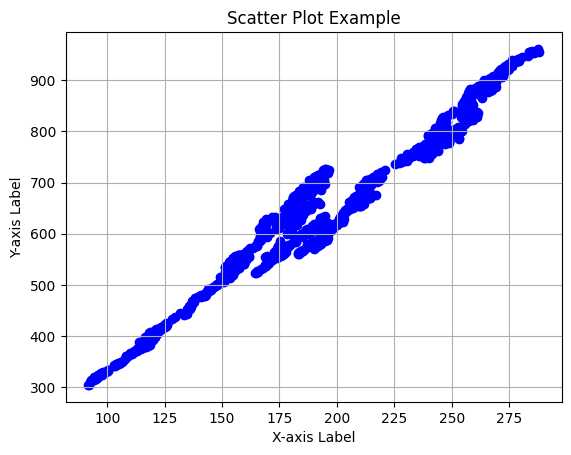

In [25]:
# plt.hist(nav_equity_bm_pct['135607'], bins=100, edgecolor='black')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Histogram Example')
# plt.show()

plt.scatter(nav_df['135607'], nav_df['100033'], color='blue', marker='o')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')
plt.grid(True)
plt.show()

In [28]:
# sharpe ratio


rf = 0.05792/252  # risk-free rate per day
nav_quant_data = []
for columns in nav_equity_pct_df.columns:
    sum = nav_equity_pct_df[columns].sum() # sum of daily returns
    n = len(nav_equity_pct_df[columns]) - nav_equity_pct_df[columns].isnull().sum() # number of non-null days
    standard_deviation = nav_equity_pct_df[columns].std()  # standard deviation of daily returns
    sharpe_ratio = ((sum/n - rf)/ standard_deviation) * np.sqrt(252)  # annualized Sharpe ratio
    # nav_quant_data.append([columns, sharpe_ratio, sum/n - rf, standard_deviation])

    # Sortino ratio
    downside_diff = np.minimum(nav_equity_pct_df[columns] - rf, 0) #downside_diff
    downside_deviation = np.sqrt(np.mean(downside_diff ** 2)) # downside deviation
    sortino_ratio = ((sum/n - rf) / downside_deviation) * np.sqrt(252)  # annualized Sortino ratio

    # Beta
    covarinace_equity = nav_equity_pct_df[columns].cov(nav_equity_bm_pct['135607'])  # covariance with benchmark
    variance_equity_benchmark = nav_equity_bm_pct['135607'].var()  # variance of benchmark 
    beta_equity = covarinace_equity / variance_equity_benchmark  # beta of equity scheme

    # Alpha
    # Regression using statsmodels
    mask = (nav_equity_bm_pct['135607'].notna()) & (nav_equity_pct_df[columns].notna())
    X = sm.add_constant(nav_equity_bm_pct[mask]['135607'])  # independent variable (benchmark returns)
    # X = sm.add_constant(nav_equity_bm_pct['135607'])  # adds a constant (alpha)
    y = nav_equity_pct_df[mask][columns]
    model = sm.OLS(y, X).fit()
    model_summary = model.summary()
    alpha_daily = model.params["const"]
    beta = model.params["135607"]  # beta from regression
    alpha_annualized = alpha_daily * 252  # annualized alpha
    
    # Treynor ratio
    treynor_ratio = (sum/n - rf)*252 / beta  # annualized Treynor ratio
    nav_quant_data.append([columns, sharpe_ratio, sortino_ratio, beta_equity,beta, alpha_annualized, treynor_ratio])

nav_quant_df = pd.DataFrame(nav_quant_data, columns=['scheme_code', 'sharpe_ratio', 'sortino_ratio', 'beta_equity', 'beta', 'alpha_annualized', 'treynor_ratio'])
       
# nav_quant_df = pd.DataFrame(nav_quant_data, columns=['scheme_code', 'sharpe_ratio', 'mean_daily_return', 'std_dev'])



/Users/adityachawra/Downloads/Startup/DataBase/Data/MF/investment_options-master/amfi_data_fetcher/MF_venv/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/adityachawra/Downloads/Startup/DataBase/Data/MF/investment_options-master/amfi_data_fetcher/MF_venv/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/adityachawra/Downloads/Startup/DataBase/Data/MF/investment_options-master/amfi_data_fetcher/MF_venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, *

In [29]:
nav_quant_df.head(20)

,scheme_code,sharpe_ratio,sortino_ratio,beta_equity,beta,alpha_annualized,treynor_ratio
0,100033,0.905739,1.227123,0.954231,0.954231,0.002477,0.147724
1,100034,0.486876,0.628296,0.944350,0.944350,-0.055547,0.085673
2,100063,0.364164,0.480511,0.598828,0.598828,-0.020865,0.074262
3,100064,0.561722,0.764050,0.595699,0.595699,0.001510,0.111131
4,100067,0.091483,0.124459,0.588714,0.588714,-0.052954,0.017494
5,100068,0.629355,0.834874,0.516402,0.516402,0.023147,0.138490
6,100080,0.398494,0.492477,0.911161,0.911161,-0.062576,0.073582
7,100156,0.940165,1.377831,0.427637,0.427637,0.059744,0.210093
8,100174,1.426571,1.957201,0.892051,0.892051,0.120015,0.275435
9,100175,1.423430,1.952743,0.891974,0.891974,0.119472,0.274833


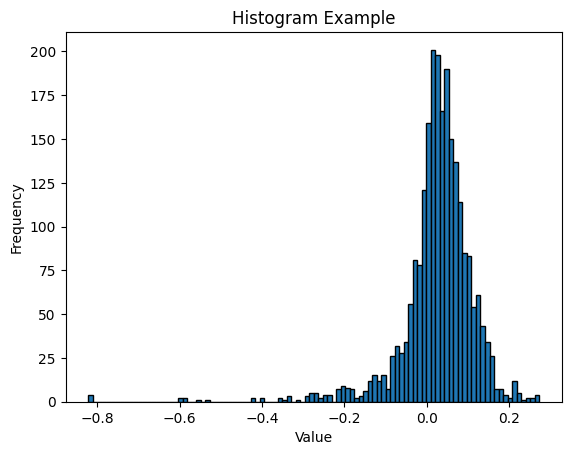

In [31]:
plt.hist(nav_quant_df['alpha_annualized'], bins=100, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()